In [5]:
%matplotlib inline
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def upwind(u_old,T_start,T_end,v,delta_x,delta_t):
    """
    INPUT
    u_old = N dimentional array
    T_start = float
    T_end = float
    v = float
    delta_x = float (= L/float(N) in next block of code given) (grid spacing)
    delta_t = float (time step)
    
    OUTPUT
    u_new = an N x 4 dimentional array with a column for each step time and a row for each step in space.
    """
    # get the length of the u_old array to be used for looping
    num_dof = len(u_old)
    # get the number of time steps to be used for looping
    num_tsteps = int(numpy.ceil((T_end-T_start)/delta_t))
    # define mu to make the formula shorter and easier to work with when implementing below
    mu = delta_t / delta_x
    #Create temporary arrays of the shape u_old to save results to during the calculations
    u_tmp = u_old.copy()
    u_new = u_old.copy()
            

    if v<0:
        for k in range(num_tsteps):
        # For every delta_t do this
        # Loop through all grid points
            for l in range(num_dof):
                # Due to indexing restraints an if statement is needed to take into account periodic boundary conditions
                # By doing this here the solver satisfies the periodic boundary conditions in Q4 also
                if (l==num_dof-1):
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[0] - u_tmp[l])
                else:
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[l+1] - u_tmp[l])

            # Update the temporary array        
            u_tmp = u_new.copy()
    
    else:
        for k in range(num_tsteps):
        # For every delta_t do this
        # Loop through all grid points ie. for each delta_x
            # for l in range(num_dof):
            for l in range(len(u_tmp)):
                #If you are at the right end of your interval, use this to take into account the periodic boundary conditions
                if (l==0):
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[l] - u_tmp[(num_dof-1)])
                else:
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[l] - u_tmp[l-1])

            # Update your temporary array        
            u_tmp = u_new.copy()
        
    return u_new
def lax_wendroff(u_old,T_start,T_end,v,delta_x,delta_t):
    """
    u_old = N dimensional array
    T_start = float
    T_end = float
    v = float
    delta_x = float (= L/float(N) in next block of code given)
    delta_t = float
    
    OUTPUT
    u_new = an N x 4 dimentional array with a column for each step time and a row for each step in space.
    """
    
    # get the len of the u_old array to be used for looping
    num_dof = len(u_old)
    # get the number of t steps to be used for looping
    num_tsteps = int(numpy.ceil((T_end-T_start)/delta_t))
    # define mu to make the formula shorter and easier to work with when implementing below
    mu = delta_t / delta_x
    #Create temporary arrays of the shape u_old to save results to during the calculations
    u_tmp = u_old.copy()
    u_new = u_old.copy()

    for k in range(num_tsteps):
    # For every delta_t do this
    # Loop through all grid points
        for l in range(num_dof):
            # Due to indexing restraints an if statement is needed to take into account periodic boundary conditions
            # By doing this here the solver satisfies the periodic boundary conditions in Q4 also
            # The lax wendroff scheme uses a central difference, ie. goes forwards and backward
            # For this reason there are two cases for indexing error and so an extra elif was needed
            # l==num_dof-1  --> [l+1] -> [0]
            if (l==num_dof-1):
                u_new[l] = u_tmp[l] - 0.5 * mu * v * (u_tmp[0] - u_tmp[l-1]) + 0.5 * (v**2) * (mu**2) *(u_tmp[0]-2*u_tmp[l]+u_tmp[l-1])
            # l==0  --> [l-1] -> [(num_dof-1)]
            elif l==0:
                u_new[l] = u_tmp[l] - 0.5 * mu * v * (u_tmp[l+1] - u_tmp[(num_dof-1)]) + 0.5 * (v**2) * (mu**2) *(u_tmp[l+1]-2*u_tmp[l]+u_tmp[(num_dof-1)])
            else:
                u_new[l] = u_tmp[l] - 0.5 * mu * v * (u_tmp[l+1] - u_tmp[l-1]) + 0.5 * (v**2) * (mu**2) *(u_tmp[l+1]-2*u_tmp[l]+u_tmp[l-1])

        # Update your temporary array        
        u_tmp = u_new.copy()
        
    return u_new

<ipython-input-25-f7018d5530e7>:49: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(x,u_upwind_a[:,2],marker='o',c='',edgecolors='black')


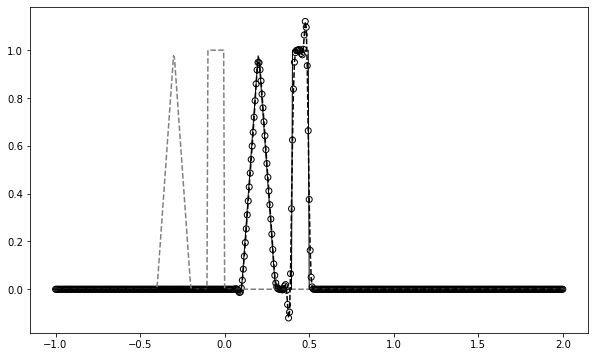

In [25]:
# Test script for the upwind method
T_start = 0.0
T_50 = 0.5
T_end = 1
L = 1
v = 1

# Define the initial condition
def IC(x):
    y= np.piecewise(
        x,
        [(x<-0.4), (-0.4 <= x)&(x < -0.2),  (-0.2 <= x)&(x< -0.1), (-0.1 <= x)&(x<0), (x>=0.0)     ],
        [0, lambda x: 1.0-abs(x+0.3) / 0.1, 0, 1, 0])
    return y
# Number of grid points (ie. number of space partitions)
N = 517

# Define array of all grid points
x = numpy.linspace(-1, 2, N)

# Use the parameters to determine the grid spacing and set time step
delta_x = x[1]-x[0]
delta_t = delta_x * 0.95

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

u_ana_up_a    = numpy.zeros((N,4))
u_upwind_a    = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
# The analatical and numerical solution are identical at t=0
u_ana_up_a[:,0] = IC(x)
u_upwind_a[:,0] =  IC(x)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array

u_ana_up_a[:,2]    = IC(x-0.5)


# Run the upwind function and save the results to the relevent index in the array

u_upwind_a[:,2] = lax_wendroff(u_ana_up_a[:,0],T_start, T_50, v, delta_x, delta_t)
fig = plt.figure(figsize=(10,6))
plt.plot(x,u_ana_up_a[:,0],ls='--',c='gray',label="analytical")

plt.plot(x,u_ana_up_a[:,2],'black',label="analytical", lw=1)
plt.scatter(x,u_upwind_a[:,2],marker='o',c='',edgecolors='black')
plt.plot(x,u_upwind_a[:,2], 'black',ls='--', label="numerical")



In [26]:
def minmod(duR,duL):
    s = (np.sign(duR) + np.sign(duL))/2
    if abs(s) == 1:
        return s*min(abs(duR),abs(duL))
    else:
        return 0

def rk2(U):
    k = np.zeros((N, 4))
    nmax = len(IC(x-0.5))
    for i in range(1,nmax):
        duR = U[t,i+1] - U[t,i]
        duL = U[t,i] - U[t,i-1]
        k[t,i] = minmod(duR,duL)
    k[t,0] = k[t,1] + (k[t,1] - k[t,2])
    k[t,nmax-1] = k[t,nmax-2] + (k[t,nmax-2] - k[t,nmax-3])
    return k

In [27]:
rk2(IC(x-0.5), x)

IndexError: arrays used as indices must be of integer (or boolean) type

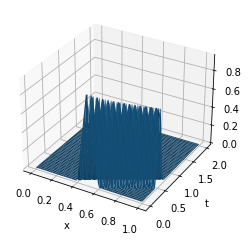

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# def u0(x):
#     y= np.piecewise(
#         x,
#         [(0.4 <= x)&(x <= 0.5),  (0.5 <= x)&(x<= 0.6)     ],
#         [lambda x: 10*(x - 0.4), lambda x: 10*(0.6 - x), 0])
#     return y

def IC(x,t):
    new = x - t
    for i in range(len(new)):
        if -0.2 > new[i] >= -0.4:
            new[i] = 1.0 - (abs(new[i]+0.3) / 0.1)
        elif 0.0 > new[i] >= -0.1:
            new[i] = 1.0
        else:
            new[i]=0
    return new

c = 0.9
h = 0.01
dt = 0.01
T = 2

N = int(np.ceil(1/h))
x = np.linspace(0, 1, N)
M = int(np.ceil(T/dt))
t = np.linspace(0, T, M)

#solve with upwind scheme
sol = np.zeros((N, M))
sol[:,0] = IC(x)
#you could add boundary values here by setting
#sol[0,:] = <your_boundary_data>
for i in range(1,len(t)):
    sol[1:,i] = sol[1:,i-1] - c*(dt/h)*(sol[1:,i-1] - sol[:-1,i-1])

#Visualization
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('t')

# T, X = np.meshgrid(t, x)
# surf = ax.plot_surface(X, T, sol)

4.999 2.9993235150432462


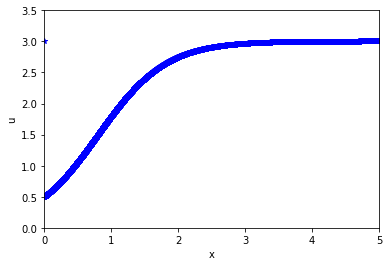

In [1]:
import numpy as np
from matplotlib.pyplot import plot,savefig
import matplotlib.pyplot  as plt
r=2
K=3
h=0.001
step=5000
u=np.zeros((1,step+1))
x=np.zeros((1,step+1))
u[0,0]=0.5
for i in range(0,step):
    u[0,i+1]=u[0,i]+h*(r*u[0,i]-u[0,i]*u[0,i]*r/K)
    x[0,i]=h*i
print(x[0,step-1],u[0,step])
plt.xlim(0,5)
plt.ylim(0,3.5)
plt.xlabel("x")
plt.ylabel("u")
plt.plot(x,u,'--*b') 
plt.show()



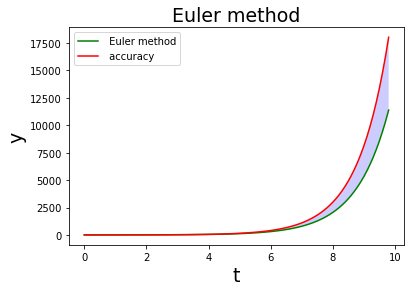

In [2]:
import math
from matplotlib import pyplot as plt


t_0 = 0
y_0 = 1
tau = 0.1
i = 1
solve = []
Euler = []
t = []
while i < 100:
    if i == 1:
        y_n = y_0
        t_n = t_0
    Euler.append(y_n)
    solve.append(math.exp(t_n))
    t.append(t_n)
    func = y_n
    y_n = y_n + tau * func
    t_n = t_n + tau
    i += 1

plt.plot(t, Euler, c='green', label=' Euler method')
plt.plot(t, solve, c='red', label=' accuracy')
plt.fill_between(t, solve, Euler, facecolor='blue', alpha=0.2)
plt.title('Euler method', fontsize=19)
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
plt.legend()
plt.show()


In [4]:
# Test script for the upwind method
T_start = 0.0
T_50 = 0.5
T_end = 1
L = 1
v = 1

# Define the initial condition
def IC(x):
    y= np.piecewise(
        x,
        [(x<-0.4), (-0.4 <= x)&(x < -0.2),  (-0.2 <= x)&(x< -0.1), (-0.1 <= x)&(x<0), (x>=0.0)     ],
        [0, lambda x: 1.0-abs(x+0.3) / 0.1, 0, 1, 0])
    return y
# Number of grid points (ie. number of space partitions)
N = 517

# Define array of all grid points
x = np.linspace(-1, 2, N)

# Use the parameters to determine the grid spacing and set time step
delta_x = x[1]-x[0]